In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris_data = load_iris()

In [5]:
X = iris_data.data
y = iris_data.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)

In [8]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [11]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]])

In [12]:
cross_val_score(knn, X_train, y_train, cv=10)

array([1.        , 0.91666667, 1.        , 0.83333333, 0.91666667,
       1.        , 1.        , 0.83333333, 0.91666667, 1.        ])

In [13]:
parameters = {
    "n_neighbors" : [3,5,7],
    "weights": ["uniform", "distance"]
}

search = GridSearchCV(KNeighborsClassifier(), param_grid=parameters, cv=10)

In [14]:
search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
search.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [16]:
knn = search.best_estimator_

In [17]:
y_pred = knn.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

1.0

In [20]:
import eli5

/home/r0shan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/r0shan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
from eli5.sklearn import PermutationImportance

In [22]:
permute_importance = PermutationImportance(knn, cv=10)

In [23]:
permute_importance.fit(X_train, y_train)
permute_importance.feature_importances_

array([0.00166667, 0.00166667, 0.58      , 0.10166667])

In [24]:
eli5.show_weights(permute_importance)

Weight,Feature
0.5800 ± 0.2943,x2
0.1017 ± 0.1676,x3
0.0017 ± 0.0623,x1
0.0017 ± 0.0912,x0


In [25]:
#last 2 columns
X = X[:, [2,3]]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
y_pred = knn.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [31]:
from mlxtend.plotting import plot_decision_regions

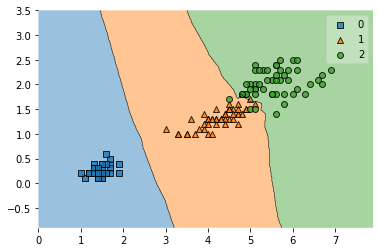

In [32]:
plot_decision_regions(X, y, knn)
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [35]:
boston_data = load_boston()

In [36]:
X = boston_data.data
y = boston_data.target

In [37]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [38]:
X = pd.DataFrame(X, columns=boston_data.feature_names)

In [39]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [41]:
knn = KNeighborsRegressor(n_neighbors=5, weights="distance")

In [42]:
knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [43]:
X_test = boston_data.data[[2,100, 302, 122, 313], :]
y_test = boston_data.target[[2,100, 302, 122, 313]]

In [44]:
# pipeline = make_pipeline(scaler, knn)
X_test_scaled = scaler.transform(X_test)

In [45]:
y_pred = knn.predict(X_test_scaled)

In [46]:
y_pred

array([34.7, 27.5, 26.4, 20.5, 21.6])

In [47]:
y_test

array([34.7, 27.5, 26.4, 20.5, 21.6])